In [1]:
import matplotlib.pyplot as plt
import numpy as np

from drowsiness_detection import config
from drowsiness_detection.metrics import (calc_classification_metrics,
calc_mean_and_std_of_classification_metrics, print_metric_results)
from drowsiness_detection.visualize import plot_roc_over_n_folds_from_predictions

plt.rcParams["figure.figsize"] = 6, 4

In [2]:
folds = list(range(1, 11))

In [3]:
# true labels
y_true_tests = [np.load(str(config.PREDICTION_DIR_PATH.joinpath(f"y_true_test_{num_fold}.npy"))) for
                num_fold in folds]
y_true_trains = [np.load(str(config.PREDICTION_DIR_PATH.joinpath(f"y_true_train_{num_fold}.npy")))
                 for num_fold in folds]
print(y_true_tests[0][:10])

[1 1 1 1 1 1 1 1 1 1]


In [6]:
# true rf labels
rf_y_true_tests = [
    np.load(str(config.PREDICTION_DIR_PATH.joinpath(f"rf_y_true_test_{num_fold}.npy"))) for num_fold
    in folds]
rf_y_true_trains = [
    np.load(str(config.PREDICTION_DIR_PATH.joinpath(f"rf_y_true_train_{num_fold}.npy"))) for
    num_fold in folds]
print(rf_y_true_tests[0][:10])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
# random forest labels
rf_y_pred_test_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                f"rf_y_pred_test_{num_fold}" in str(path)])[-1] for num_fold in
                        folds]
rf_y_pred_train_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                 f"rf_y_pred_train_{num_fold}" in str(path)])[-1] for num_fold in
                         folds]
rf_y_pred_tests = [np.load(str(path)) for path in rf_y_pred_test_paths]
rf_y_pred_trains = [np.load(str(path)) for path in rf_y_pred_train_paths]
print(rf_y_pred_tests[0][:10])
print(rf_y_pred_test_paths[0])

[0.30380638 0.30196362 0.30487044 0.30834339 0.32392127 0.34845212
 0.35312159 0.34931019 0.35179296 0.3484848 ]
/home/tim/IM/data/predictions/60sec/rf_y_pred_test_1_20220811-143840.npy


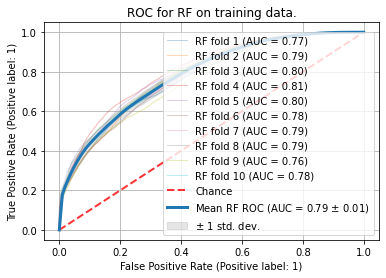

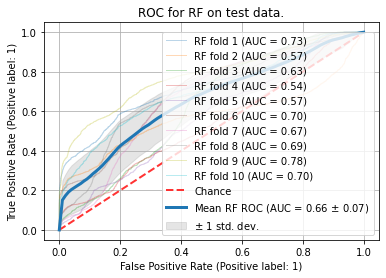

In [8]:
plot_roc_over_n_folds_from_predictions(y_trues=rf_y_true_trains, y_preds=rf_y_pred_trains,
                                       model_name="RF", split_name="training")
plot_roc_over_n_folds_from_predictions(y_trues=rf_y_true_tests, y_preds=rf_y_pred_tests,
                                       model_name="RF", split_name="test")


In [5]:
# cnn labels
cnn_y_pred_test_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                 f"cnn_y_pred_test_{num_fold}" in str(path)])[-1] for num_fold in
                         folds]
cnn_y_pred_train_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                  f"cnn_y_pred_train_{num_fold}" in str(path)])[-1] for num_fold in
                          folds]
cnn_y_pred_tests = [np.squeeze(np.load(str(path))) for path in cnn_y_pred_test_paths]
cnn_y_pred_trains = [np.squeeze(np.load(str(path))) for path in cnn_y_pred_train_paths]
print(cnn_y_pred_tests[0][:10])
print(cnn_y_pred_test_paths[0])

[0.9818855  0.9948143  0.99987686 0.99953496 0.9274551  0.79358375
 0.5672206  0.89085615 0.95435274 0.9752989 ]
/home/tim/IM/data/predictions/60sec/cnn_preds/cnn_y_pred_test_1_20220917-140810.npy


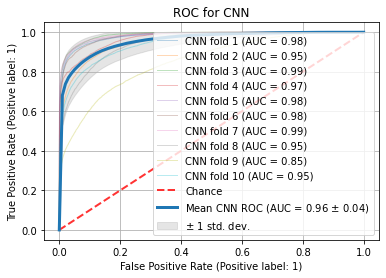

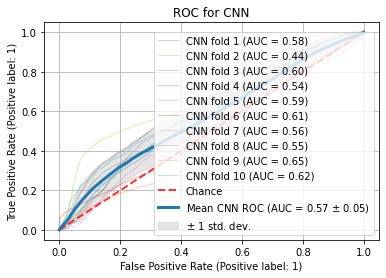

In [6]:
plot_roc_over_n_folds_from_predictions(y_trues=y_true_trains, y_preds=cnn_y_pred_trains,
                                       model_name="CNN")
plot_roc_over_n_folds_from_predictions(y_trues=y_true_tests, y_preds=cnn_y_pred_tests,
                                       model_name="CNN")


In [11]:
# lstm labels
lstm_y_pred_test_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                  f"lstm_y_pred_test_{num_fold}" in str(path)])[-1] for num_fold in
                          folds]
lstm_y_pred_train_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                   f"lstm_y_pred_train_{num_fold}" in str(path)])[-1] for num_fold
                           in folds]
lstm_y_pred_tests = [np.squeeze(np.load(str(path))) for path in lstm_y_pred_test_paths]
lstm_y_pred_trains = [np.squeeze(np.load(str(path))) for path in lstm_y_pred_train_paths]
print(lstm_y_pred_tests[0][:10])
print(lstm_y_pred_test_paths[-1])

[0.7065247  0.860673   0.7569017  0.7687488  0.7642271  0.67841554
 0.75659347 0.75592786 0.74692166 0.8092896 ]
/home/tim/IM/data/predictions/60sec/lstm_y_pred_test_10_20220830-214028.npy


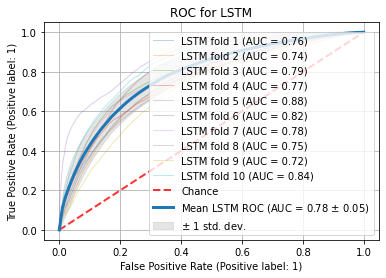

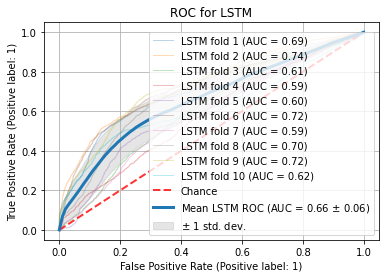

In [12]:
plot_roc_over_n_folds_from_predictions(y_trues=y_true_trains, y_preds=lstm_y_pred_trains,
                                       model_name="LSTM")
plot_roc_over_n_folds_from_predictions(y_trues=y_true_tests, y_preds=lstm_y_pred_tests,
                                       model_name="LSTM")


In [13]:
# bi-lstm labels
bi_lstm_y_pred_test_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                     f"bi-lstm_y_pred_test_{num_fold}" in str(path)])[-1] for
                             num_fold in folds]
bi_lstm_y_pred_train_paths = [sorted([path for path in config.PREDICTION_DIR_PATH.iterdir() if
                                      f"bi-lstm_y_pred_train_{num_fold}" in str(path)])[-1] for
                              num_fold in folds]
bi_lstm_y_pred_tests = [np.squeeze(np.load(str(path))) for path in bi_lstm_y_pred_test_paths]
bi_lstm_y_pred_trains = [np.squeeze(np.load(str(path))) for path in bi_lstm_y_pred_train_paths]
print(bi_lstm_y_pred_tests[0][:10])
print(bi_lstm_y_pred_test_paths[-2])

[0.6307428  0.9034233  0.7151251  0.76212835 0.87404066 0.6513245
 0.8820187  0.7694897  0.6791487  0.78618777]
/home/tim/IM/data/predictions/60sec/bi-lstm_y_pred_test_9_20220831-031027.npy


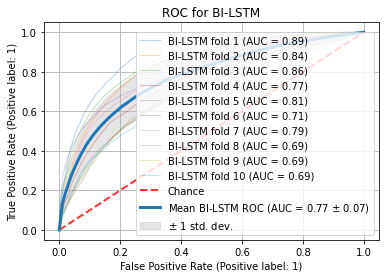

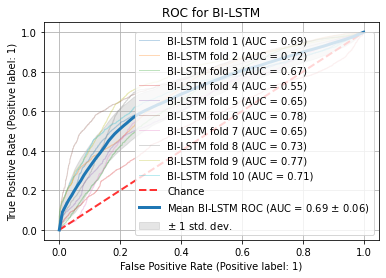

In [14]:
plot_roc_over_n_folds_from_predictions(y_trues=y_true_trains, y_preds=bi_lstm_y_pred_trains,
                                       model_name="BI-LSTM")
plot_roc_over_n_folds_from_predictions(y_trues=y_true_tests, y_preds=bi_lstm_y_pred_tests,
                                       model_name="BI-LSTM")


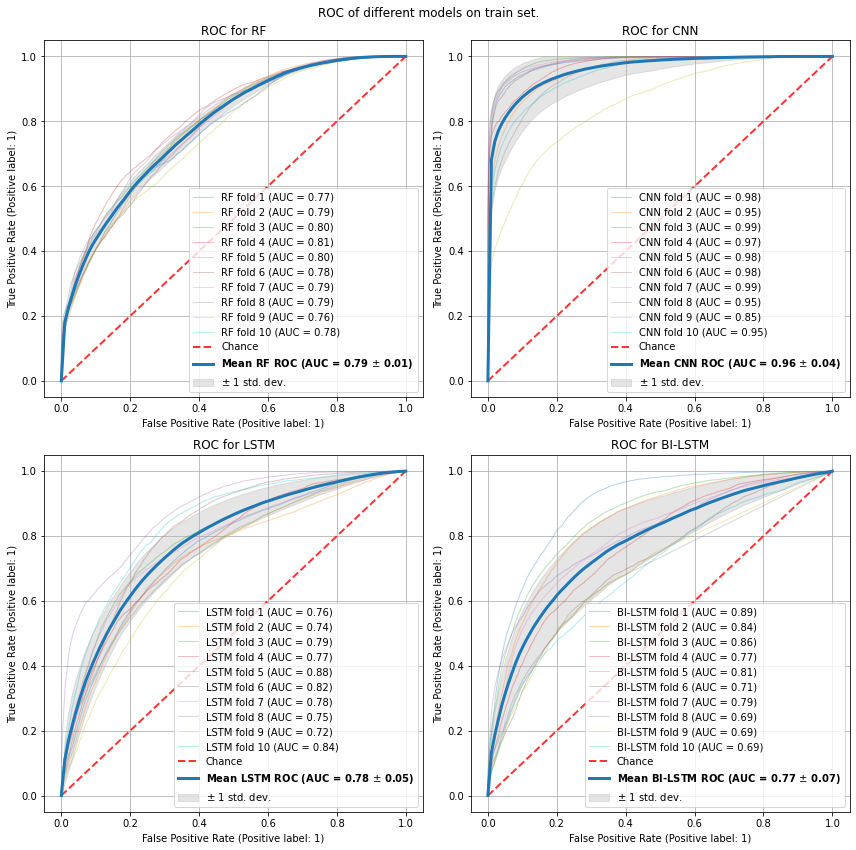

In [15]:
y_preds_train = [rf_y_pred_trains, cnn_y_pred_trains, lstm_y_pred_trains, bi_lstm_y_pred_trains]
names = ["RF", "CNN", "LSTM", "BI-LSTM"]
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 3 * len(y_preds_train), 3 * len(y_preds_train)
fig, axes = plt.subplots(int((len(names) + 1) / 2), int((len(names) + 1) / 2))
axes = axes.reshape(-1)
fig.suptitle("ROC of different models on train set.")
for y_preds, name, ax in zip(y_preds_train, names, axes):
    if name == "RF":
        plot_roc_over_n_folds_from_predictions(y_trues=rf_y_true_trains, y_preds=y_preds,
                                               model_name=name, ax=ax)
    else:
        plot_roc_over_n_folds_from_predictions(y_trues=y_true_trains, y_preds=y_preds,
                                               model_name=name, ax=ax)

    for lh in ax.legend().get_texts():
        if "Mean" in str(lh):
            lh.set_fontweight("bold")

plt.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = old_figsize


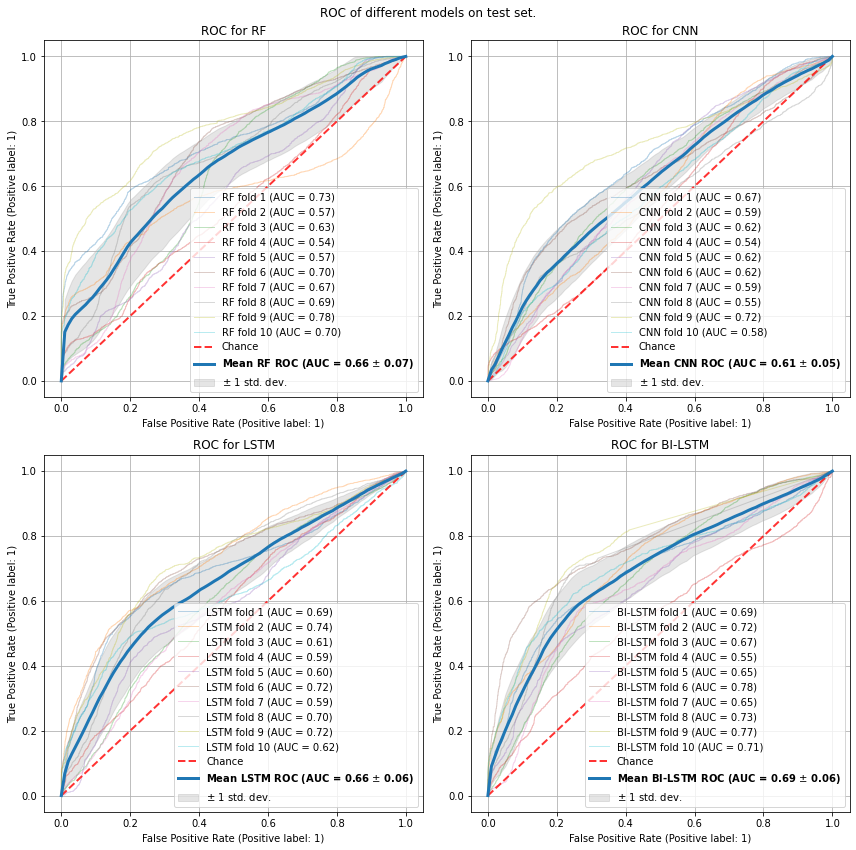

In [16]:
y_preds_test = [rf_y_pred_tests, cnn_y_pred_tests, lstm_y_pred_tests, bi_lstm_y_pred_tests]
names = ["RF", "CNN", "LSTM", "BI-LSTM"]
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 3 * len(y_preds_test), 3 * len(y_preds_test)
fig, axes = plt.subplots(int((len(names) + 1) / 2), int((len(names) + 1) / 2))
axes = axes.reshape(-1)
fig.suptitle("ROC of different models on test set.")
for y_preds, name, ax in zip(y_preds_test, names, axes):
    if name == "RF":
        plot_roc_over_n_folds_from_predictions(y_trues=rf_y_true_tests, y_preds=y_preds,
                                               model_name=name, ax=ax)
    else:
        plot_roc_over_n_folds_from_predictions(y_trues=y_true_tests, y_preds=y_preds,
                                               model_name=name, ax=ax)

    for lh in ax.legend().get_texts():
        if "Mean" in str(lh):
            lh.set_fontweight("bold")

plt.tight_layout()
plt.show()
plt.rcParams["figure.figsize"] = old_figsize


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

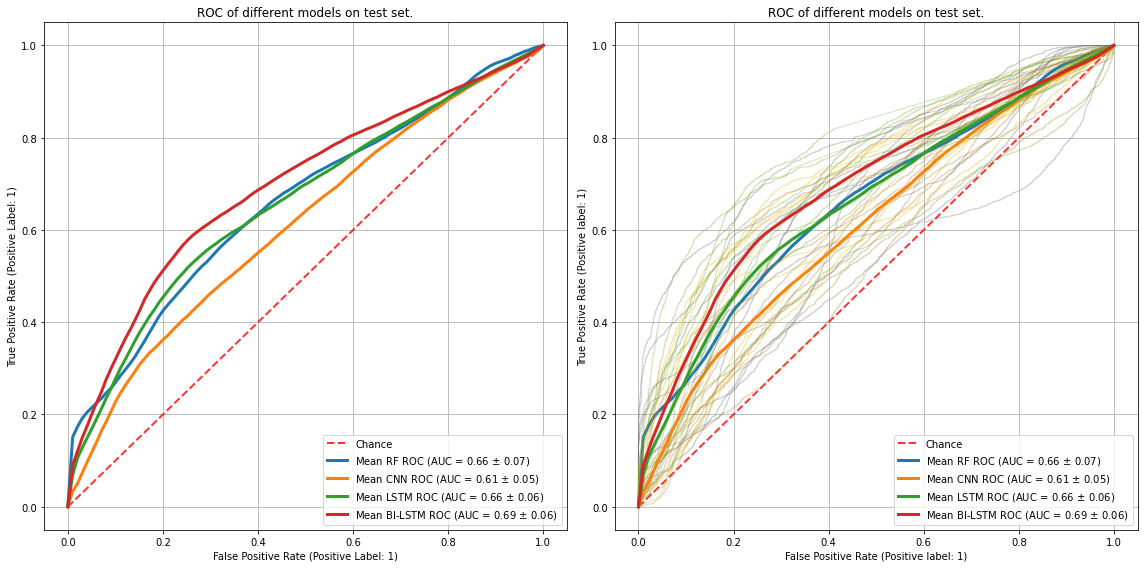

In [34]:
y_preds_test = [rf_y_pred_tests, cnn_y_pred_tests, lstm_y_pred_tests, bi_lstm_y_pred_tests]
names = ["RF", "CNN", "LSTM", "BI-LSTM"]
colors = plt.cm.get_cmap('Dark2_r').colors
old_figsize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"] = 16, 8
fig, axes = plt.subplots(1, 2)
# fig.suptitle("ROC of different models on test set.")
ax = axes[0]
for y_preds, name, color in zip(y_preds_test, names, colors):
    if name == "RF":
        plot_roc_over_n_folds_from_predictions(y_trues=rf_y_true_tests, y_preds=y_preds,
                                               model_name=name, ax=ax, show_std_in_Legend=False,
                                               plot_fold_labels=False, color=color,
                                               plot_std=False, plot_folds=False)
    else:
        plot_roc_over_n_folds_from_predictions(y_trues=y_true_tests, y_preds=y_preds,
                                               model_name=name, ax=ax,
                                               show_std_in_Legend=False, plot_fold_labels=False,
                                               plot_chance=False, color=color,
                                               plot_std=False, plot_folds=False)
ax.set_title("ROC of different models on test set.")
plt.grid()
ax.grid()

ax = axes[1]
for y_preds, name, color in zip(y_preds_test, names, colors):
    if name == "RF":
        plot_roc_over_n_folds_from_predictions(y_trues=rf_y_true_tests, y_preds=y_preds,
                                               model_name=name, ax=ax, show_std_in_Legend=False,
                                               plot_fold_labels=False, color=color,
                                               plot_std=False, plot_folds=True)
    else:
        plot_roc_over_n_folds_from_predictions(y_trues=y_true_tests, y_preds=y_preds,
                                               model_name=name, ax=ax,
                                               show_std_in_Legend=False, plot_fold_labels=False,
                                               plot_chance=False, color=color,
                                               plot_std=False, plot_folds=True)
ax.set_title("ROC of different models on test set.")

plt.tight_layout()
ax.grid()
plt.grid()
plt.show()
plt.rcParams["figure.figsize"] = old_figsize


In [18]:
results = calc_mean_and_std_of_classification_metrics(y_trues=rf_y_true_trains,
                                                      y_preds=rf_y_pred_trains)
print("Random Forest: ")
print_metric_results(results)
print()
results = calc_mean_and_std_of_classification_metrics(y_trues=y_true_trains,
                                                      y_preds=cnn_y_pred_trains)
print("CNN: ")
print_metric_results(results)
print()
results = calc_mean_and_std_of_classification_metrics(y_trues=y_true_trains,
                                                      y_preds=lstm_y_pred_trains)
print("LSTM: ")
print_metric_results(results)
print()
results = calc_mean_and_std_of_classification_metrics(y_trues=y_true_trains,
                                                      y_preds=bi_lstm_y_pred_trains)
print("BI-LSTM: ")
print_metric_results(results)
print()

Random Forest: 
Mean Accuracy = 0.71 ± 0.016
Mean Precision = 0.63 ± 0.032
Mean Recall = 0.63 ± 0.044
Mean ROC AUC = 0.69 ± 0.014

CNN: 
Mean Accuracy = 0.87 ± 0.072
Mean Precision = 0.87 ± 0.118
Mean Recall = 0.82 ± 0.175
Mean ROC AUC = 0.86 ± 0.076

LSTM: 
Mean Accuracy = 0.72 ± 0.034
Mean Precision = 0.65 ± 0.059
Mean Recall = 0.67 ± 0.06
Mean ROC AUC = 0.71 ± 0.033

BI-LSTM: 
Mean Accuracy = 0.73 ± 0.047
Mean Precision = 0.68 ± 0.058
Mean Recall = 0.6 ± 0.136
Mean ROC AUC = 0.71 ± 0.059



In [19]:
y_true_tests[0].shape, bi_lstm_y_pred_tests[0].shape

((6493,), (6493,))

In [20]:
results = calc_mean_and_std_of_classification_metrics(y_trues=rf_y_true_tests,
                                                      y_preds=rf_y_pred_tests)
print("Random Forest: ")
print_metric_results(results)
print()
results = calc_mean_and_std_of_classification_metrics(y_trues=y_true_tests,
                                                      y_preds=cnn_y_pred_tests)
print("CNN: ")
print_metric_results(results)
print()
results = calc_mean_and_std_of_classification_metrics(y_trues=y_true_tests,
                                                      y_preds=lstm_y_pred_tests)
print("LSTM: ")
print_metric_results(results)
print()
results = calc_mean_and_std_of_classification_metrics(y_trues=y_true_tests,
                                                      y_preds=bi_lstm_y_pred_tests)
print("BI-LSTM: ")
print_metric_results(results)
print()

Random Forest: 
Mean Accuracy = 0.64 ± 0.052
Mean Precision = 0.58 ± 0.077
Mean Recall = 0.55 ± 0.096
Mean ROC AUC = 0.63 ± 0.055

CNN: 
Mean Accuracy = 0.59 ± 0.039
Mean Precision = 0.55 ± 0.116
Mean Recall = 0.5 ± 0.203
Mean ROC AUC = 0.58 ± 0.033

LSTM: 
Mean Accuracy = 0.64 ± 0.049
Mean Precision = 0.59 ± 0.078
Mean Recall = 0.57 ± 0.11
Mean ROC AUC = 0.63 ± 0.049

BI-LSTM: 
Mean Accuracy = 0.68 ± 0.05
Mean Precision = 0.65 ± 0.092
Mean Recall = 0.53 ± 0.102
Mean ROC AUC = 0.66 ± 0.05



In [21]:
accs_rf, recalls_rf, precisions_rf, aucs_rf = calc_classification_metrics(y_trues=rf_y_true_tests,
                                                                          y_preds=rf_y_pred_tests)
accs_cnn, recalls_cnn, precisions_cnn, aucs_cnn = calc_classification_metrics(y_trues=y_true_tests,
                                                                              y_preds=cnn_y_pred_tests)
accs_lstm, recalls_lstm, precisions_lstm, aucs_lstm = calc_classification_metrics(
    y_trues=y_true_tests, y_preds=lstm_y_pred_tests)
accs_bi_lstm, recalls_bi_lstm, precisions_bi_lstm, aucs_bi_lstm = calc_classification_metrics(
    y_trues=y_true_tests, y_preds=bi_lstm_y_pred_tests)


In [22]:
from scipy import stats


def find_significant_results(m1, m2, metric_name, model_name):
    res = stats.ttest_rel(m1, m2)
    if res.pvalue < 0.05:
        if res.statistic < 0:
            print(
                f"The {metric_name} of {model_name} is significantly better than of the Random Forest Model with p={res.pvalue}.")
        else:
            print(
                f"The {metric_name} of Random Forest is significantly better than the {model_name} Model with p={res.pvalue}.")


model_names = ["CNN", "LSTM", "BI-LSTM"]
accs = [accs_cnn, accs_lstm, accs_bi_lstm]
recalls = [recalls_cnn, recalls_lstm, recalls_bi_lstm]
precisions = [precisions_cnn, precisions_lstm, precisions_bi_lstm]
aucs = [aucs_cnn, aucs_lstm, aucs_bi_lstm]

for m2s, metric_name, model_name in zip(accs, ["Accuracy"] * len(accs), model_names):
    find_significant_results(accs_rf, m2s, metric_name, model_name)

for m2s, metric_name, model_name in zip(recalls, ["Recall"] * len(recalls), model_names):
    find_significant_results(recalls_rf, m2s, metric_name, model_name)

for m2s, metric_name, model_name in zip(precisions, ["Precision"] * len(precisions), model_names):
    find_significant_results(precisions_rf, m2s, metric_name, model_name)

for m2s, metric_name, model_name in zip(aucs, ["AUC"] * len(aucs), model_names):
    find_significant_results(aucs_rf, m2s, metric_name, model_name)

The Accuracy of Random Forest is significantly better than the CNN Model with p=0.00041601145677355874.
The Accuracy of BI-LSTM is significantly better than of the Random Forest Model with p=0.020042503858903344.
The Precision of BI-LSTM is significantly better than of the Random Forest Model with p=0.025761069691644507.
The AUC of Random Forest is significantly better than the CNN Model with p=0.010013093868160568.
The AUC of BI-LSTM is significantly better than of the Random Forest Model with p=0.027548660296490297.


In [23]:
def print_metrics(m1, m2):
    for one, two in zip(m1, m2):
        print(f"{round(one, 2)} <-> {round(two, 2)}")
    res = stats.ttest_rel(m1, m2)
    print(res)


print("Accuracy:")
print_metrics(accs_rf, accs_bi_lstm)
print()
print("Precision:")
print_metrics(precisions_rf, precisions_bi_lstm)
print()
print("Recall:")
print_metrics(recalls_rf, recalls_bi_lstm)
print()
print("AUC:")
print_metrics(aucs_rf, aucs_bi_lstm)
print()

Accuracy:
0.69 <-> 0.68
0.59 <-> 0.65
0.59 <-> 0.63
0.57 <-> 0.59
0.57 <-> 0.67
0.66 <-> 0.74
0.65 <-> 0.62
0.68 <-> 0.73
0.71 <-> 0.73
0.69 <-> 0.72
Ttest_relResult(statistic=-2.8201376356249486, pvalue=0.020042503858903344)

Precision:
0.62 <-> 0.6
0.54 <-> 0.64
0.56 <-> 0.64
0.51 <-> 0.55
0.43 <-> 0.58
0.6 <-> 0.85
0.58 <-> 0.54
0.66 <-> 0.7
0.73 <-> 0.75
0.59 <-> 0.7
Ttest_relResult(statistic=-2.666707456876472, pvalue=0.025761069691644507)

Recall:
0.62 <-> 0.6
0.56 <-> 0.53
0.6 <-> 0.5
0.31 <-> 0.31
0.44 <-> 0.47
0.65 <-> 0.48
0.6 <-> 0.62
0.57 <-> 0.67
0.62 <-> 0.64
0.57 <-> 0.47
Ttest_relResult(statistic=1.0347255627953766, pvalue=0.3277986172448442)

AUC:
0.68 <-> 0.66
0.59 <-> 0.64
0.59 <-> 0.62
0.54 <-> 0.56
0.55 <-> 0.63
0.66 <-> 0.71
0.64 <-> 0.62
0.67 <-> 0.72
0.71 <-> 0.73
0.66 <-> 0.67
Ttest_relResult(statistic=-2.625778816167761, pvalue=0.027548660296490297)



In [24]:
# negative t statistic means the mean of a is smaller than mean of b and vice versa

In [25]:
# w(critical) for n=3 is 0.767, for n=10 its 0.842
w_crit = 0.842
w = stats.shapiro(aucs_rf)
if w.statistic < w_crit:
    print("not normal distribution")
else:
    print("normal distributed")

normal distributed


In [26]:
df = len(accs_rf) - 1
print("degrees of freedom =", df)

degrees of freedom = 9


In [27]:
rf = (0.73, 0.57, 0.63)

In [28]:
bi_lstm = (0.69, 0.72, 0.67)
res = stats.ttest_rel(rf, bi_lstm)
print(res)

Ttest_relResult(statistic=-0.9078412990032035, pvalue=0.4597881954507852)
